In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.layers import Conv2D, BatchNormalization, Add, AveragePooling2D
from tensorflow.keras.layers import ReLU, Flatten, Dense,Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import keras 

from google.colab import files
import os

In [2]:
from keras.datasets import cifar10

seed = 19
np.random.seed(seed)
tf.random.set_seed(seed)

epoch = 150
subtract_pixel_mean = True
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_shape = x_train.shape[1:]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

if subtract_pixel_mean:
  x_train_mean = np.mean(x_train, axis=0)
  x_train -= x_train_mean
  x_test -= x_train_mean

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



def lr_schedule(epoch):
  lr = 1e-3
  if epoch > 180:
      lr *= 0.5e-3
  elif epoch > 160:
      lr *= 1e-3
  elif epoch > 120:
      lr *= 1e-2
  elif epoch > 80:
      lr *= 1e-1
  print('Learning rate: ', lr)
  return lr

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
50000 train samples
10000 test samples


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 16)   0           ['batch_normalization[0][0]']

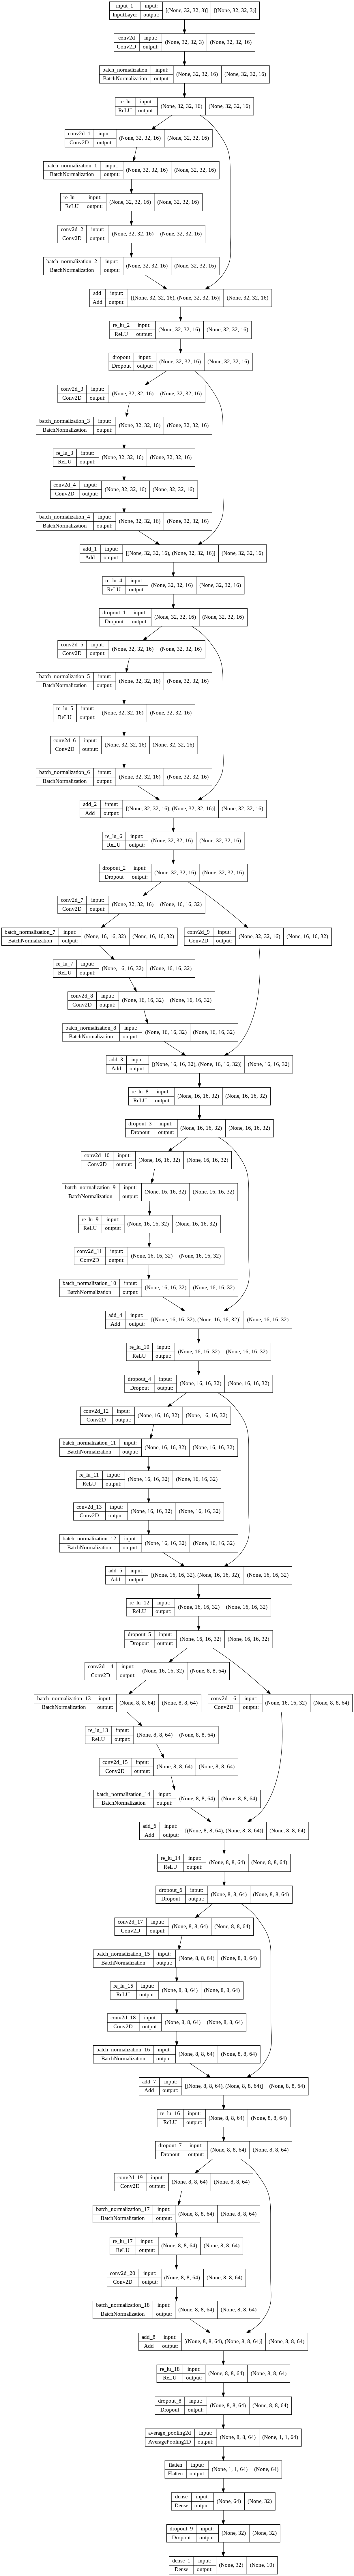

In [3]:

    
    
#now we'll create our model

#block1
input = Input( shape = (32,32,3))


x = Conv2D(16, kernel_size=(3,3),padding='SAME')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
#

for _ in range(3):

 tensor = x
 x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
 x = ReLU()(x)
#
 x = Conv2D(16, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
    

 x = Add()([x,tensor])
 x = ReLU()(x)
 x = Dropout(0.25)(x)

for _ in range(1):
 tensor1 = x

 

 x = Conv2D(32, kernel_size=(3, 3),padding='SAME',strides = 2)(x)
 x = BatchNormalization()(x)
 x = ReLU()(x)
 #
 x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
 
 tensor1 = Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 2)(tensor1)

 x = Add()([x,tensor1])
 x = ReLU()(x)
 x = Dropout(0.25)(x)
 #
for _ in range(2):

 tensor = x
 x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
 x = ReLU()(x)
#
 x = Conv2D(32, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
    

 x = Add()([x,tensor])
 x = ReLU()(x)
 x = Dropout(0.25)(x)

for _ in range(1):
 tensor1 = x

 #block5

 x = Conv2D(64, kernel_size=(3, 3),padding='SAME', strides = 2)(x)
 x = BatchNormalization()(x)
 x = ReLU()(x)
 #
 x = Conv2D(64, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
 
 tensor1 = Conv2D(64, kernel_size = (3,3), padding = 'same', strides = 2)(tensor1)

 x = Add()([x,tensor1])
 x = ReLU()(x)
 x = Dropout(0.25)(x)

for _ in range(2):

 tensor = x
 x = Conv2D(64, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
 x = ReLU()(x)
#
 x = Conv2D(64, kernel_size=(3, 3),padding='SAME')(x)
 x = BatchNormalization()(x)
    

 x = Add()([x,tensor])
 x = ReLU()(x)
 x = Dropout(0.25)(x)

x = AveragePooling2D(pool_size=8)(x)
    #classifier
    
x = Flatten()(x)


x = Dense (units = 32, activation = 'relu')(x)
x = Dropout(0.25)(x)
output = Dense( units = num_classes, activation  = 'softmax')(x)
   
#compiling the model


model = Model(inputs = input, outputs = output)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, )




In [4]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
    optimizer=Adam(learning_rate=lr_schedule(0)),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

callbacks = [early_stopping]
history = model.fit(
    x_train,
    y_train,
    shuffle = True,
    validation_data= (x_test,y_test),
    batch_size = 48,
    callbacks = callbacks,
    epochs=epoch,
    verbose = 1
)

Learning rate:  0.001
Learning rate:  0.001
Epoch 1/150
1042/1042 [==============================] - 31s 16ms/step - loss: 1.7788 - accuracy: 0.3283 - val_loss: 1.7090 - val_accuracy: 0.3876 - lr: 0.0010
Learning rate:  0.001
Epoch 2/150
1042/1042 [==============================] - 17s 16ms/step - loss: 1.4412 - accuracy: 0.4752 - val_loss: 1.2943 - val_accuracy: 0.5234 - lr: 0.0010
Learning rate:  0.001
Epoch 3/150
1042/1042 [==============================] - 17s 16ms/step - loss: 1.2905 - accuracy: 0.5377 - val_loss: 1.3438 - val_accuracy: 0.5170 - lr: 0.0010
Learning rate:  0.001
Epoch 4/150
1042/1042 [==============================] - 16s 16ms/step - loss: 1.1907 - accuracy: 0.5762 - val_loss: 1.0765 - val_accuracy: 0.6107 - lr: 0.0010
Learning rate:  0.001
Epoch 5/150
1042/1042 [==============================] - 16s 16ms/step - loss: 1.1282 - accuracy: 0.6002 - val_loss: 1.0069 - val_accuracy: 0.6462 - lr: 0.0010
Learning rate:  0.001
Epoch 6/150
1042/1042 [=======================

In [5]:
model.save('model.h5')

In [10]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4216 - accuracy: 0.8645


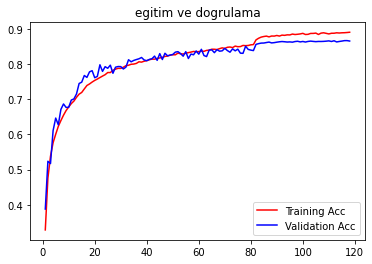

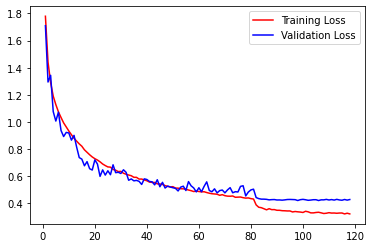

<Figure size 432x288 with 0 Axes>

In [6]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'b',color = 'red',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('egitim ve dogrulama')
plt.legend()
plt.figure()
#
plt.plot(epochs,loss,'b',color = 'red',label='Training Loss ')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.legend()
plt.figure()

plt.show()